In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
import time

In [ ]:
######load daata########
X_train_orignal = pd.read_csv('/content/sample_data/train_images.csv');
y_train_orignal=pd.read_csv('/content/sample_data/train_labels.csv');
X_test_orignal = pd.read_csv('/content/sample_data/test_images.csv');

y_test_orignal =pd.read_csv('/content/sample_data/test_labels.csv');

In [ ]:
X_train_orignal.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.341,0.342,0.343,0.344,0.345,0.346,0.347,0.348,0.349,0.350
0,0,0,0,0,0,1,0,0,0,0,...,119,114,130,76,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,22,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,33,96,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,22,...,0,0,0,0,133,167,73,0,0,0


In [ ]:
X_train_orignal.shape

(59999, 784)

In [ ]:
y_train_orignal.head()

,9
0,0
1,0
2,3
3,0
4,2


In [ ]:
y_train_orignal.value_counts()

,count
9,
0,6000
1,6000
2,6000
3,6000
4,6000
5,6000
6,6000
7,6000
8,6000


In [ ]:
y_train_orignal.shape

(59999, 1)

So X_train has 784 values in column which is 28*28 = 784 grid of pixels. Now since we have 9 clases in y_train labels and we need only 2 classes - 1,0 for pullover and trouser, so I will filter out data for label values 1,2.

In [ ]:
#%%
#####################So X_train has 784 values in column which is 28*28 = 784 grid of pixels. Now since we have 9 clases in y_train labels and we need only 2 classes - 1,0
##############for pullover and trouser, so I will filter out data for label values 1,2.##############
class_selection = np.isin(y_train_orignal, [1,2])
X_train_selected_classes = X_train_orignal[class_selection]
y_train_selected_classes = y_train_orignal[class_selection]

In [ ]:
class_selection_test = np.isin(y_test_orignal, [1,2])
X_test_selected_classes = X_test_orignal[class_selection_test]
y_test_selected_classes = y_test_orignal[class_selection_test]

In [ ]:
X_train_selected_classes.shape

(12000, 784)

In [ ]:
y_train_selected_classes.value_counts()

,count
9,
1,6000
2,6000


In [ ]:
X_train_selected_classes.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.341,0.342,0.343,0.344,0.345,0.346,0.347,0.348,0.349,0.350
4,0,0,0,0,1,0,0,0,0,22,...,0,0,0,0,133,167,73,0,0,0
6,0,0,0,0,0,1,1,0,0,0,...,0,0,3,0,82,237,231,70,0,0
15,0,0,0,0,0,0,0,0,0,53,...,173,188,107,0,0,0,0,0,0,0
20,0,0,0,0,0,0,0,0,9,0,...,3,7,0,0,0,0,0,0,0,0
26,0,0,0,1,0,0,0,0,0,70,...,2,5,0,14,158,147,0,0,0,0


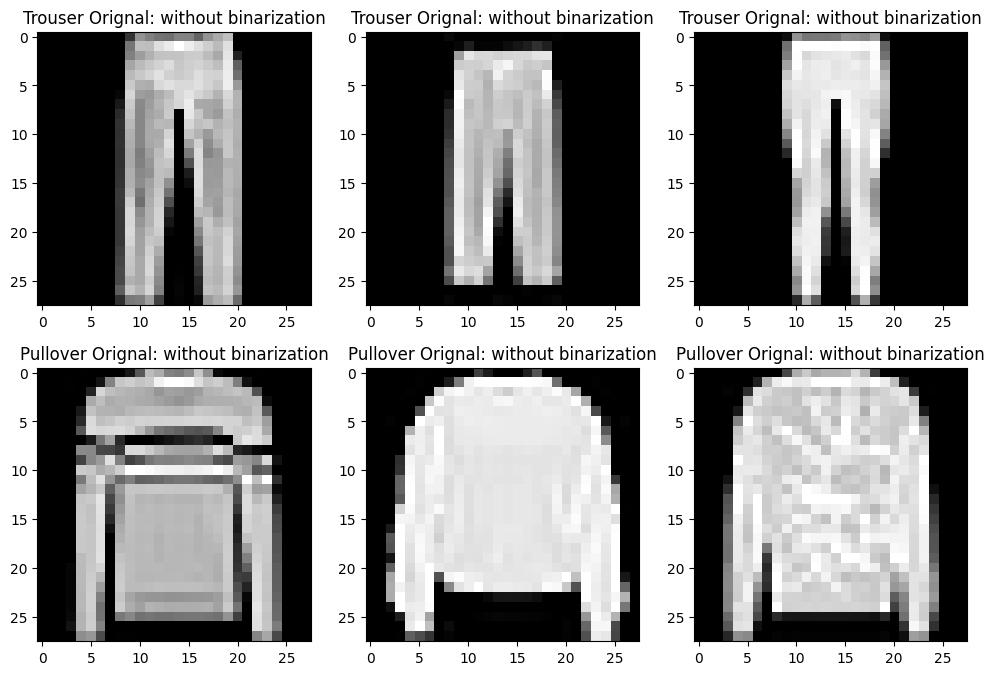

In [ ]:
#########orignal pictures without binariazation#####
############
trouser_index = np.where(y_train_selected_classes==1)[0][:3]
pullover_index = np.where(y_train_selected_classes==2)[0][:3]
fig, ax = plt.subplots(2,3, figsize = (12,8))
for i, index in enumerate(trouser_index):
  ax[0,i].imshow(X_train_selected_classes.iloc[index].values.reshape(28,28), cmap='gray')
  ax[0,i].set_title('Trouser Orignal: without binarization')
for i, index in enumerate(pullover_index):
  ax[1,i].imshow(X_train_selected_classes.iloc[index].values.reshape(28,28), cmap='gray')
  ax[1,i].set_title('Pullover Orignal: without binarization')
plt.show()

Binarization – Selecting a threshold, ‘del’, to be 127:
• All pixel values less than ‘del’ are given value 0
• All pixel values greater than or equal to ‘del’ are given value 1.

Coverted each value to 0 or 1 depending on the threshold value

In [ ]:
X_train = (X_train_selected_classes>=127).astype(int)

In [ ]:
X_test  = (X_test_selected_classes>=127).astype(int)

In [ ]:
X_train.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.341,0.342,0.343,0.344,0.345,0.346,0.347,0.348,0.349,0.350
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
15,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0


In [ ]:
y_train = (y_train_selected_classes==2).astype(int)

In [ ]:
y_test = (y_test_selected_classes==2).astype(int)

0->Trouser
1->Pullover

In [ ]:
y_train.value_counts()

,count
9,
0,6000
1,6000


Checking data by visualization

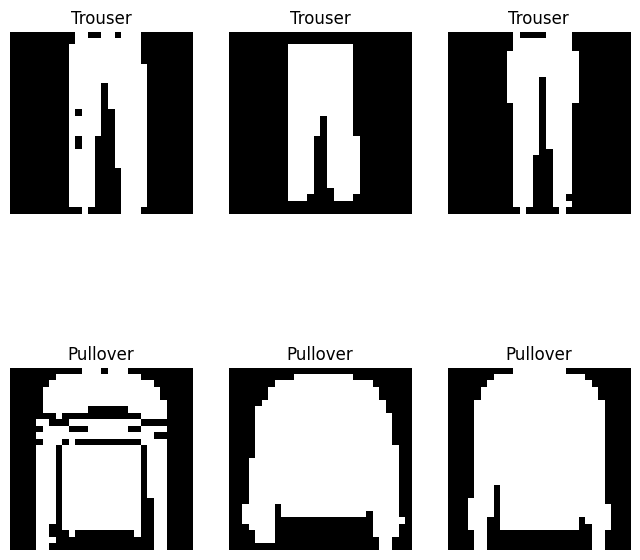

In [ ]:
trouser_index = np.where(y_train==0)[0][:3]
pullover_index = np.where(y_train==1)[0][:3]
fig, ax = plt.subplots(2,3, figsize = (8,8))
for i, index in enumerate(trouser_index):
  ax[0,i].imshow(X_train.iloc[index].values.reshape(28,28), cmap='gray')
  ax[0,i].set_title('Trouser')
  ax[0,i].axis('off')
for i, index in enumerate(pullover_index):
  ax[1,i].imshow(X_train.iloc[index].values.reshape(28,28), cmap='gray')
  ax[1,i].set_title('Pullover')
  ax[1,i].axis('off')
plt.show()


Naive Bayes Classification

In [ ]:

def train_data_NB(X, y):
  classes = np.unique(y)
  rows, features = X.shape
  class_prior_probability = {}
  for i in classes:
    count = np.sum(y == i)
    class_prior_prob = count/rows
    class_prior_probability[i] = class_prior_prob.values[0]
    print(f"Class prior probability for class {i} is {class_prior_probability[i]}");

  class_conditional_probability = {}
  alpha=1
  #print(X.isna().sum().sum())########fix null####
  for i in classes:
    mask=(y==i)
    indices = np.where(mask)[0]
    x_class = X[indices]
    rows = x_class.shape[0]
    feature_count = np.sum(x_class, axis=0)
    laplace_smoothed_feature_count = feature_count+alpha
    ##print(laplace_smoothed_feature_count)
    laplace_smoothed_rows = rows+(2*alpha)
    ##print(laplace_smoothed_rows)
    class_conditional_probability[i] = laplace_smoothed_feature_count/laplace_smoothed_rows
    ###print(class_conditional_probability[i])
    class_conditional_probability[i] = np.clip(class_conditional_probability[i], 1e-10, 1-1e-10)
    ##print(f"Class conditional probability for class {i} is {class_conditional_probability[i]}");
  return class_prior_probability, class_conditional_probability




In [ ]:
def predict_NB(X, class_prior_probability, class_conditional_probability):
  classes = np.unique(list(class_prior_probability.keys()))
  rows = X.shape[0]
  number_cls = len(classes)
  ########taking log so that we can add the probabilities instead of multiplying them, and getting a value near to zero
  #initialized log_probability array################
  log_likelihood_prob = np.zeros((rows, number_cls))
  for i,cls in enumerate(classes):



    #######if x=0 then prob= class_conditional_probability[cls], when x=1 prob = 1-class_conditional_probability[cls]
    class_log_conditional_probability = X*np.log(class_conditional_probability[cls])+(1-X)*np.log(1-class_conditional_probability[cls])
    class_log_prior_probability = np.log(class_prior_probability[cls])
    log_likelihood_prob[:,i] = class_log_prior_probability+np.sum(class_log_conditional_probability, axis=1)
  #we used log(a/b)= log a- log b, so that value doesn't diminishes to zero
  probability = np.exp(log_likelihood_prob-np.max(log_likelihood_prob, axis=1, keepdims=True))
  y_prob = probability/np.sum(probability, axis=1, keepdims=True)
  #######below line will give me the maximum probability, I also tried finding log probabilities as a>b, then log(a)>log(b)
  #but was anyways required actual probabilities##########
  y_pred = classes[np.argmax(y_prob, axis=1)]
  #print(y_pred
  return y_pred, y_prob


In [ ]:
X_train_np = X_train.values if isinstance(X_train, pd.DataFrame) else X_train
y_train_np = y_train.values if isinstance(y_train, pd.Series) else y_train
X_test_np = X_test.values if isinstance(X_test, pd.DataFrame) else X_test
y_test_np = y_test.values if isinstance(y_test, pd.Series) else y_test


class_prior_probability, class_conditional_probability = train_data_NB(X_train_np, y_train_np)
y_pred_train, y_proba_train = predict_NB(X_train_np, class_prior_probability, class_conditional_probability)
y_pred_test, y_proba_test = predict_NB(X_test_np, class_prior_probability, class_conditional_probability)

#metrics calculation for train

y_train_np = y_train_np.values.ravel().astype(int)





y_test_np = y_test_np.values.ravel().astype(int)

metrics = {
    "naive_bayes": {"train": {}, "test": {}},
    "decision_tree": {"train": {}, "test": {}}
}

print("Metrics for train")
classes = np.unique(np.concatenate((y_train_np, y_pred_train)))

for cls in classes:
  true_positive = np.sum((y_train_np==cls) & (y_pred_train==cls))
  true_negative = np.sum((y_train_np!=cls) & (y_pred_train!=cls))

  false_positive = np.sum((y_train_np!=cls) & (y_pred_train==cls))
  false_negative = np.sum((y_train_np==cls) & (y_pred_train!=cls))


  tpr = true_positive/(true_positive+false_negative)



  fpr = false_positive/(false_positive+true_negative)
  accuracy = (true_positive+true_negative)/(true_positive+true_negative+false_positive+false_negative)
  precision = true_positive/(true_positive+false_positive)
  recall = true_positive/(true_positive+false_negative)
  metrics["naive_bayes"]["train"][f"tpr_{cls}"] = tpr
  metrics["naive_bayes"]["train"][f"fpr_{cls}"] = fpr
  metrics["naive_bayes"]["train"][f"accuracy_{cls}"] = accuracy
  metrics["naive_bayes"]["train"][f"precision_{cls}"] = precision
  metrics["naive_bayes"]["train"][f"recall_{cls}"] = recall

  print(f"TPR for class {cls} is {tpr}")
  print(f"FPR for class {cls} is {fpr}")

  print(f"Accuracy for class {cls} is {accuracy}")
  print(f"Precision for class {cls} is {precision}")


  print(f"Recall for class {cls} is {recall}")

#metrics for test
print("Metrics for test")
classes = np.unique(np.concatenate((y_test_np, y_pred_test)))

for cls in classes:
  true_positive = np.sum((y_test_np==cls) & (y_pred_test==cls))

  true_negative = np.sum((y_test_np!=cls) & (y_pred_test!=cls))
  false_positive = np.sum((y_test_np!=cls) & (y_pred_test==cls))



  false_negative = np.sum((y_test_np==cls) & (y_pred_test!=cls))
  tpr = true_positive/(true_positive+false_negative)
  fpr = false_positive/(false_positive+true_negative)


  accuracy = (true_positive+true_negative)/(true_positive+true_negative+false_positive+false_negative)
  precision = true_positive/(true_positive+false_positive)
  recall = true_positive/(true_positive+false_negative)


  print(f"TPR for class {cls} is {tpr}")
  metrics["naive_bayes"]["test"][f"tpr_{cls}"] = tpr
  metrics["naive_bayes"]["test"][f"fpr_{cls}"] = fpr
  metrics["naive_bayes"]["test"][f"accuracy_{cls}"] = accuracy
  metrics["naive_bayes"]["test"][f"precision_{cls}"] = precision
  metrics["naive_bayes"]["test"][f"recall_{cls}"] = recall
  print(f"FPR for class {cls} is {fpr}")
  print(f"Accuracy for class {cls} is {accuracy}")
  print(f"Precision for class {cls} is {precision}")
  print(f"Recall for class {cls} is {recall}")




/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


Class prior probability for class 0 is 0.5
Class prior probability for class 1 is 0.5
Metrics for train
TPR for class 0 is 0.9675
FPR for class 0 is 0.10383333333333333
Accuracy for class 0 is 0.9318333333333333
Precision for class 0 is 0.9030802738021158
Recall for class 0 is 0.9675
TPR for class 1 is 0.8961666666666667
FPR for class 1 is 0.0325
Accuracy for class 1 is 0.9318333333333333
Precision for class 1 is 0.9650035893754487
Recall for class 1 is 0.8961666666666667
Metrics for test
TPR for class 0 is 0.964
FPR for class 0 is 0.096
Accuracy for class 0 is 0.934
Precision for class 0 is 0.909433962264151
Recall for class 0 is 0.964
TPR for class 1 is 0.904
FPR for class 1 is 0.036
Accuracy for class 1 is 0.934
Precision for class 1 is 0.9617021276595744
Recall for class 1 is 0.904


ROC-AUC curve

In [ ]:
def roc_auc_metrics(y_true, y_pred_proba, threshold):
  true_positive = 0
  false_positive = 0
  true_negative = 0
  false_negative = 0
  for i in range(len(y_true)):
    if y_pred_proba[i]>=threshold:
      if y_true[i]==1:
        true_positive+=1
      else:
        false_positive+=1
    else:
      if y_true[i]==1:
        false_negative+=1
      else:
        true_negative+=1
  tpr = true_positive/(true_positive+false_negative)
  fpr = false_positive/(false_positive+true_negative)
  return tpr, fpr

In [ ]:
#roc and auc cuve
def roc_auc_curve(binary_y_test, y_proba, cls):
  thres = np.linspace(0,1,100)

  tpr_metric = []
  fpr_metric = []
  for t in thres:

    tpr, fpr = roc_auc_metrics(binary_y_test,  y_proba, t)
    tpr_metric.append(tpr)
    fpr_metric.append(fpr)






  tpr_array = np.array(tpr_metric)
  fpr_array = np.array(fpr_metric)

  idx_sort = np.argsort(fpr_array)

  tpr_array = tpr_array[idx_sort]


  fpr_array = fpr_array[idx_sort]
  ## print(tpr_array)
  ## print(fpr_metric)

  auc = 0
  for i in range(1, len(fpr_array)):
      auc += (fpr_array[i] - fpr_array[i-1]) * (tpr_array[i] + tpr_array[i-1]) / 2

  plt.figure(figsize=(5, 6))
  plt.plot(fpr_array, tpr_array, 'red', linewidth=2, label=f'AUC = {auc:.4f}')
  plt.plot([0, 1], [0, 1], 'b--')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title(f'ROC Curve for class {cls}')
  plt.legend(loc="lower right")
  plt.grid()
  plt.tight_layout()
  plt.show()


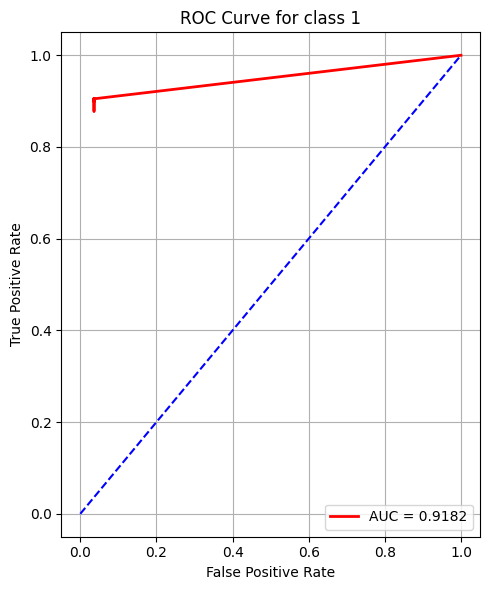

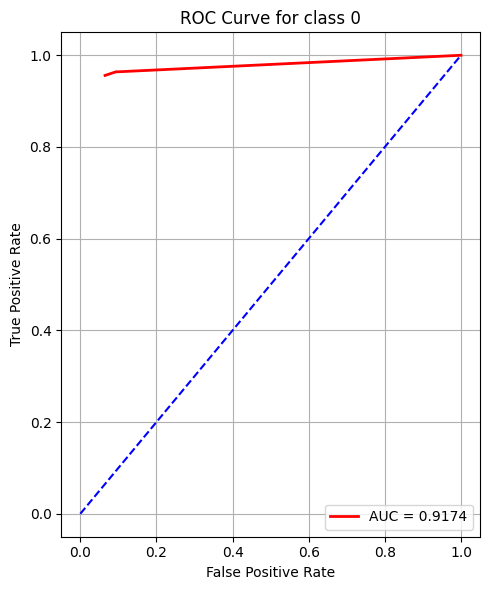

In [ ]:
y_proba_class_1 = y_proba_test[:, 1];
y_proba_class_0 = y_proba_test[:, 0];
binary_y_test_1 = (y_test_np == 1).astype(int)
binary_y_test_0 = (y_test_np == 0).astype(int)
# for class=1->pullower
roc_auc_curve(binary_y_test_1, y_proba_class_1, 1)
# forclass=0->trouser
roc_auc_curve(binary_y_test_0, y_proba_class_0, 0)

In [ ]:
from sklearn.tree import DecisionTreeClassifier



dt= DecisionTreeClassifier(
    criterion='gini',
    max_depth=10,
    random_state=5644 #added course number for this cls
)
dt.fit(X_train_np, y_train_np)
y_pred_train_dt = dt.predict(X_train_np)
y_pred_test_dt = dt.predict(X_test_np)
y_pred_proba_train_dt = dt.predict_proba(X_train_np)
y_pred_proba_test_dt = dt.predict_proba(X_test_np)



#%% score metrics

#metrics calculation for train


print("Metrics for train")
classes = np.unique(np.concatenate((y_train_np, y_pred_train_dt)))

for cls in classes:
  true_positive = np.sum((y_train_np==cls) & (y_pred_train_dt==cls))

  true_negative = np.sum((y_train_np!=cls) & (y_pred_train_dt!=cls))
  false_positive = np.sum((y_train_np!=cls) & (y_pred_train_dt==cls))

  false_negative = np.sum((y_train_np==cls) & (y_pred_train_dt!=cls))
  tpr = true_positive/(true_positive+false_negative)
  fpr = false_positive/(false_positive+true_negative)
  accuracy = (true_positive+true_negative)/(true_positive+true_negative+false_positive+false_negative)
  precision = true_positive/(true_positive+false_positive)
  recall = true_positive/(true_positive+false_negative)


  metrics["decision_tree"]["train"][f"tpr_{cls}"] = tpr
  metrics["decision_tree"]["train"][f"fpr_{cls}"] = fpr

  metrics["decision_tree"]["train"][f"accuracy_{cls}"] = accuracy
  metrics["decision_tree"]["train"][f"precision_{cls}"] = precision
  metrics["decision_tree"]["train"][f"recall_{cls}"] = recall

  print(f"TPR for class {cls} is {tpr}")
  print(f"FPR for class {cls} is {fpr}")
  print(f"Accuracy for class {cls} is {accuracy}")
  print(f"Precision for class {cls} is {precision}")
  print(f"Recall for class {cls} is {recall}")


#metrics for test
print("Metrics for test")
classes = np.unique(np.concatenate((y_test_np, y_pred_test_dt)))

for cls in classes:
  true_positive = np.sum((y_test_np==cls) & (y_pred_test_dt==cls))
  true_negative = np.sum((y_test_np!=cls) & (y_pred_test_dt!=cls))
  false_positive = np.sum((y_test_np!=cls) & (y_pred_test_dt==cls))
  false_negative = np.sum((y_test_np==cls) & (y_pred_test_dt!=cls))
  tpr = true_positive/(true_positive+false_negative)
  fpr = false_positive/(false_positive+true_negative)


  metrics["decision_tree"]["test"][f"tpr_{cls}"] = tpr
  metrics["decision_tree"]["test"][f"fpr_{cls}"] = fpr
  accuracy = (true_positive+true_negative)/(true_positive+true_negative+false_positive+false_negative)
  precision = true_positive/(true_positive+false_positive)
  recall = true_positive/(true_positive+false_negative)
  metrics["decision_tree"]["test"][f"accuracy_{cls}"] = accuracy
  metrics["decision_tree"]["test"][f"precision_{cls}"] = precision
  metrics["decision_tree"]["test"][f"recall_{cls}"] = recall

  print(f"TPR for class {cls} is {tpr}")
  print(f"FPR for class {cls} is {fpr}")




  print(f"Accuracy for class {cls} is {accuracy}")
  print(f"Precision for class {cls} is {precision}")
  print(f"Recall for class {cls} is {recall}")

Metrics for train
TPR for class 0 is 0.9868333333333333
FPR for class 0 is 0.0035
Accuracy for class 0 is 0.9916666666666667
Precision for class 0 is 0.9964658364187142
Recall for class 0 is 0.9868333333333333
TPR for class 1 is 0.9965
FPR for class 1 is 0.013166666666666667
Accuracy for class 1 is 0.9916666666666667
Precision for class 1 is 0.9869593925387917
Recall for class 1 is 0.9965
Metrics for test
TPR for class 0 is 0.971
FPR for class 0 is 0.024
Accuracy for class 0 is 0.9735
Precision for class 0 is 0.9758793969849247
Recall for class 0 is 0.971
TPR for class 1 is 0.976
FPR for class 1 is 0.029
Accuracy for class 1 is 0.9735
Precision for class 1 is 0.9711442786069652
Recall for class 1 is 0.976


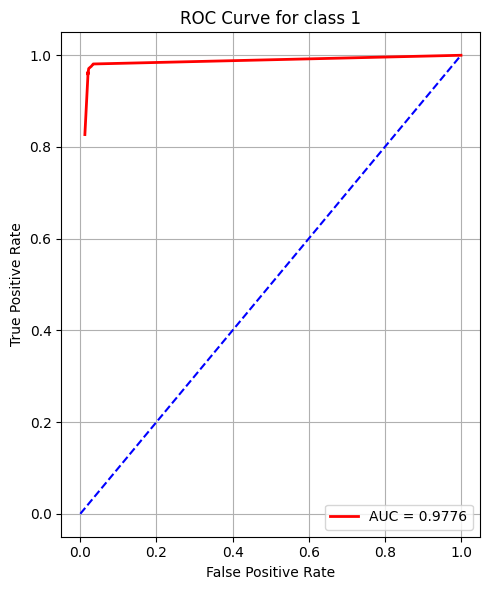

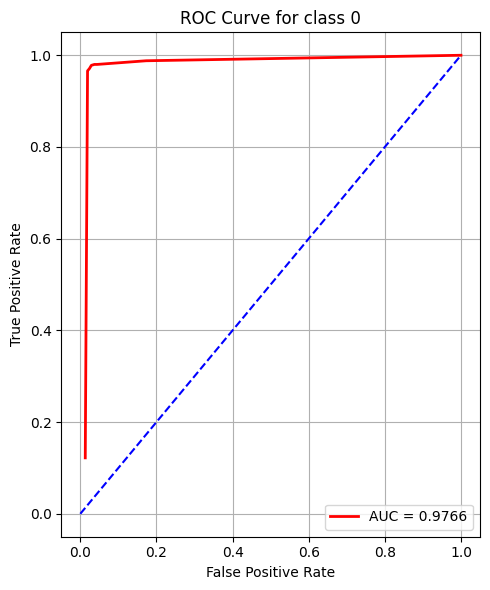

In [ ]:
y_proba_class_1_dt = y_pred_proba_test_dt[:, 1];
y_proba_class_0_dt = y_pred_proba_test_dt[:, 0];
binary_y_test_1_dt = (y_test_np == 1).astype(int)
binary_y_test_1_dt = (y_test_np == 1).astype(int)
binary_y_test_0_dt = (y_test_np == 0).astype(int)
############# for class=1->pullower
roc_auc_curve(binary_y_test_1_dt, y_proba_class_1_dt, 1)
################# forclass=0->trouser###
roc_auc_curve(binary_y_test_0_dt, y_proba_class_0_dt, 0)

In [ ]:
#################comparing two models##################
classes = np.unique(np.concatenate((y_test_np, y_pred_test, y_pred_test_dt)))
class_names = {0: "Trouser", 1: "Pullover"}

nb_train_acc = np.mean(y_train_np == y_pred_train)
nb_test_acc = np.mean(y_test_np == y_pred_test)
dt_train_acc = np.mean(y_train_np == y_pred_train_dt)
dt_test_acc = np.mean(y_test_np == y_pred_test_dt)

metrics["naive_bayes"]["train"]["overall_accuracy"] = nb_train_acc
metrics["naive_bayes"]["test"]["overall_accuracy"] = nb_test_acc

metrics["decision_tree"]["train"]["overall_accuracy"] = dt_train_acc
metrics["decision_tree"]["test"]["overall_accuracy"] = dt_test_acc

print("\n\n=============== MODEL COMPARISON ===============\n")
print("Overall Accuracy:")
print(f"                    Training     Testing")
print(f"Naive Bayes:        {nb_train_acc:.4f}      {nb_test_acc:.4f}")
print(f"Decision Tree:      {dt_train_acc:.4f}      {dt_test_acc:.4f}")

nb_gap = nb_train_acc - nb_test_acc
dt_gap = dt_train_acc - dt_test_acc
print(f"\nOverfitting Gap (train-test):")
print(f"Naive Bayes:        {nb_gap:.4f}")
print(f"Decision Tree:      {dt_gap:.4f}")



print("\nPrecision by Class (Test Data):")
for cls in classes:
    nb_precision = metrics["naive_bayes"]["test"][f"precision_{cls}"]
    dt_precision = metrics["decision_tree"]["test"][f"precision_{cls}"]
    print(f"Class {class_names[cls]}:")
    print(f"  Naive Bayes:   {nb_precision:.4f}")
    print(f"  Decision Tree: {dt_precision:.4f}")
    print(f"  Difference:    {nb_precision - dt_precision:.4f}")

print("\nRecall by Class (Test Data):")
for cls in classes:
    nb_recall = metrics["naive_bayes"]["test"][f"recall_{cls}"]
    dt_recall = metrics["decision_tree"]["test"][f"recall_{cls}"]
    print(f"Class {class_names[cls]}:")
    print(f"  Naive Bayes:   {nb_recall:.4f}")
    print(f"  Decision Tree: {dt_recall:.4f}")
    print(f"  Difference:    {nb_recall - dt_recall:.4f}")
print("\nTrue Positive Rate by Class (Test Data):")
for cls in classes:
    nb_tpr = metrics["naive_bayes"]["test"][f"tpr_{cls}"]
    dt_tpr = metrics["decision_tree"]["test"][f"tpr_{cls}"]
    print(f"Class {class_names[cls]}:")
    print(f"  Naive Bayes:   {nb_tpr:.4f}")
    print(f"  Decision Tree: {dt_tpr:.4f}")
    print(f"  Difference:    {nb_tpr - dt_tpr:.4f}")



print("\nFalse Positive Rate by Class (Test Data):")
for cls in classes:
    nb_fpr = metrics["naive_bayes"]["test"][f"fpr_{cls}"]
    dt_fpr = metrics["decision_tree"]["test"][f"fpr_{cls}"]
    print(f"Class {class_names[cls]}:")
    print(f"  Naive Bayes:   {nb_fpr:.4f}")
    print(f"  Decision Tree: {dt_fpr:.4f}")
    print(f"  Difference:    {nb_fpr - dt_fpr:.4f}")



=============== MODEL COMPARISON ===============

Overall Accuracy:
                    Training     Testing
Naive Bayes:        0.9318      0.9340
Decision Tree:      0.9917      0.9735

Overfitting Gap (train-test):
Naive Bayes:        -0.0022
Decision Tree:      0.0182

Precision by Class (Test Data):
Class Trouser:
  Naive Bayes:   0.9094
  Decision Tree: 0.9759
  Difference:    -0.0664
Class Pullover:
  Naive Bayes:   0.9617
  Decision Tree: 0.9711
  Difference:    -0.0094

Recall by Class (Test Data):
Class Trouser:
  Naive Bayes:   0.9640
  Decision Tree: 0.9710
  Difference:    -0.0070
Class Pullover:
  Naive Bayes:   0.9040
  Decision Tree: 0.9760
  Difference:    -0.0720

True Positive Rate by Class (Test Data):
Class Trouser:
  Naive Bayes:   0.9640
  Decision Tree: 0.9710
  Difference:    -0.0070
Class Pullover:
  Naive Bayes:   0.9040
  Decision Tree: 0.9760
  Difference:    -0.0720

False Positive Rate by Class (Test Data):
Class Trouser:
  Naive Bayes:   0.0960
  Decis

Bonus Threshold: 100


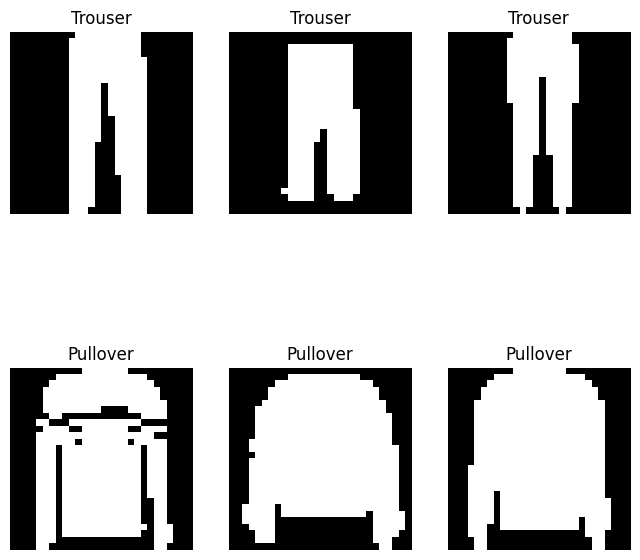

/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


Class prior probability for class 0 is 0.5
Class prior probability for class 1 is 0.5
Metrics for train
Metrics for test
Metrics for train
Metrics for test


=============== MODEL COMPARISON ===============

Model Performance Comparison (Test Data)
Metric               Naive Bayes     Decision Tree   Difference (NB-DT)
-----------------------------------------------------------------
Overall Accuracy     0.9510         0.9770         -0.0260

--- Class: Trouser ---
Accuracy             0.9510         0.9770         -0.0260
Precision            0.9413         0.9760         -0.0348
Recall               0.9620         0.9780         -0.0160
TPR                  0.9620         0.9780         -0.0160
FPR                  0.0600         0.0240         0.0360

--- Class: Pullover ---
Accuracy             0.9510         0.9770         -0.0260
Precision            0.9611         0.9780         -0.0168
Recall               0.9400         0.9760         -0.0360
TPR                  0.9400       

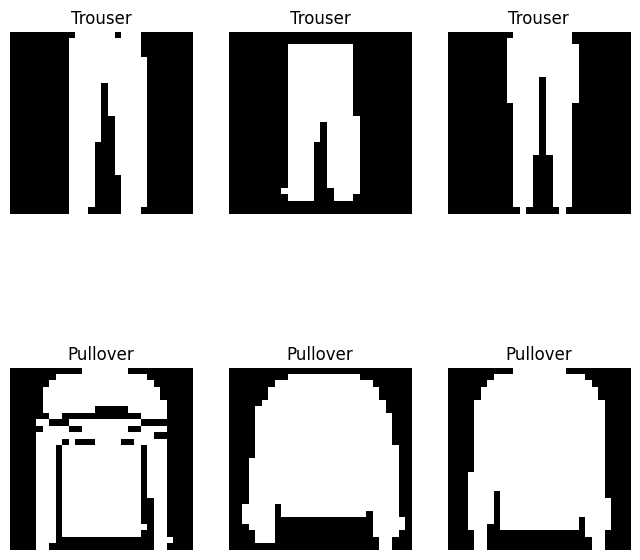

/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


Class prior probability for class 0 is 0.5
Class prior probability for class 1 is 0.5
Metrics for train
Metrics for test
Metrics for train
Metrics for test


=============== MODEL COMPARISON ===============

Model Performance Comparison (Test Data)
Metric               Naive Bayes     Decision Tree   Difference (NB-DT)
-----------------------------------------------------------------
Overall Accuracy     0.9445         0.9810         -0.0365

--- Class: Trouser ---
Accuracy             0.9445         0.9810         -0.0365
Precision            0.9295         0.9791         -0.0496
Recall               0.9620         0.9830         -0.0210
TPR                  0.9620         0.9830         -0.0210
FPR                  0.0730         0.0210         0.0520

--- Class: Pullover ---
Accuracy             0.9445         0.9810         -0.0365
Precision            0.9606         0.9829         -0.0223
Recall               0.9270         0.9790         -0.0520
TPR                  0.9270       

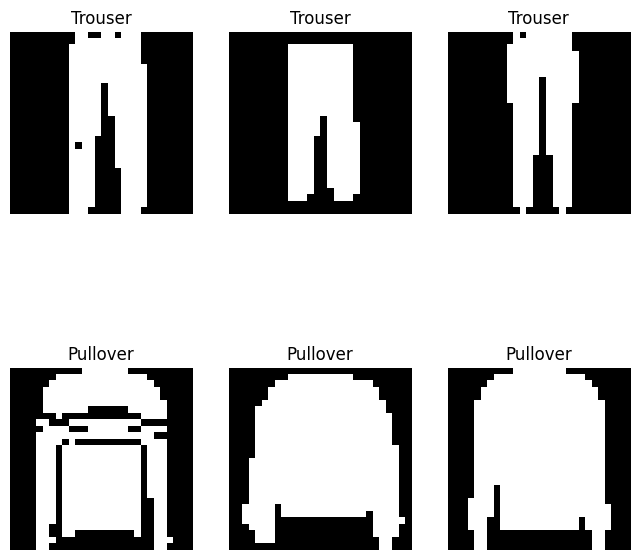

/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


Class prior probability for class 0 is 0.5
Class prior probability for class 1 is 0.5
Metrics for train
Metrics for test
Metrics for train
Metrics for test


=============== MODEL COMPARISON ===============

Model Performance Comparison (Test Data)
Metric               Naive Bayes     Decision Tree   Difference (NB-DT)
-----------------------------------------------------------------
Overall Accuracy     0.9405         0.9735         -0.0330

--- Class: Trouser ---
Accuracy             0.9405         0.9735         -0.0330
Precision            0.9207         0.9768         -0.0561
Recall               0.9640         0.9700         -0.0060
TPR                  0.9640         0.9700         -0.0060
FPR                  0.0830         0.0230         0.0600

--- Class: Pullover ---
Accuracy             0.9405         0.9735         -0.0330
Precision            0.9622         0.9702         -0.0080
Recall               0.9170         0.9770         -0.0600
TPR                  0.9170       

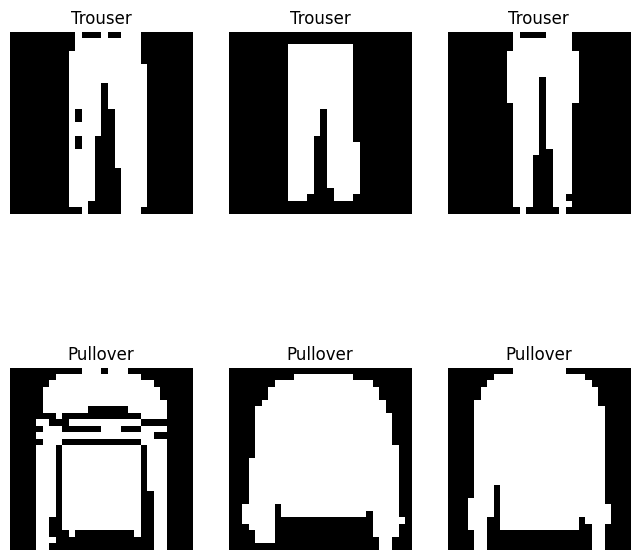

/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


Class prior probability for class 0 is 0.5
Class prior probability for class 1 is 0.5
Metrics for train
Metrics for test
Metrics for train
Metrics for test


=============== MODEL COMPARISON ===============

Model Performance Comparison (Test Data)
Metric               Naive Bayes     Decision Tree   Difference (NB-DT)
-----------------------------------------------------------------
Overall Accuracy     0.9325         0.9735         -0.0410

--- Class: Trouser ---
Accuracy             0.9325         0.9735         -0.0410
Precision            0.9069         0.9711         -0.0643
Recall               0.9640         0.9760         -0.0120
TPR                  0.9640         0.9760         -0.0120
FPR                  0.0990         0.0290         0.0700

--- Class: Pullover ---
Accuracy             0.9325         0.9735         -0.0410
Precision            0.9616         0.9759         -0.0143
Recall               0.9010         0.9710         -0.0700
TPR                  0.9010       

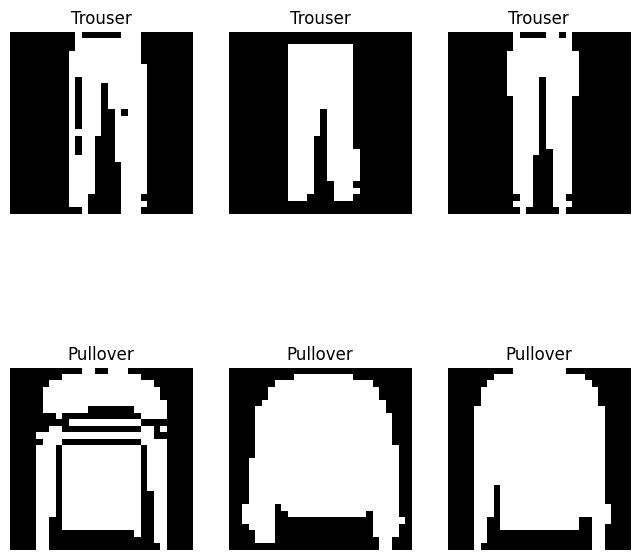

/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


Class prior probability for class 0 is 0.5
Class prior probability for class 1 is 0.5
Metrics for train
Metrics for test
Metrics for train
Metrics for test


=============== MODEL COMPARISON ===============

Model Performance Comparison (Test Data)
Metric               Naive Bayes     Decision Tree   Difference (NB-DT)
-----------------------------------------------------------------
Overall Accuracy     0.9205         0.9660         -0.0455

--- Class: Trouser ---
Accuracy             0.9205         0.9660         -0.0455
Precision            0.8861         0.9632         -0.0771
Recall               0.9650         0.9690         -0.0040
TPR                  0.9650         0.9690         -0.0040
FPR                  0.1240         0.0370         0.0870

--- Class: Pullover ---
Accuracy             0.9205         0.9660         -0.0455
Precision            0.9616         0.9688         -0.0072
Recall               0.8760         0.9630         -0.0870
TPR                  0.8760       

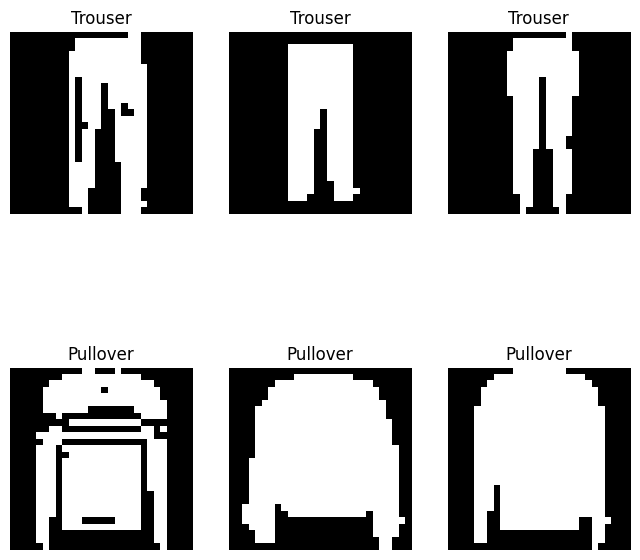

/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


Class prior probability for class 0 is 0.5
Class prior probability for class 1 is 0.5
Metrics for train
Metrics for test
Metrics for train
Metrics for test


=============== MODEL COMPARISON ===============

Model Performance Comparison (Test Data)
Metric               Naive Bayes     Decision Tree   Difference (NB-DT)
-----------------------------------------------------------------
Overall Accuracy     0.9065         0.9630         -0.0565

--- Class: Trouser ---
Accuracy             0.9065         0.9630         -0.0565
Precision            0.8652         0.9548         -0.0896
Recall               0.9630         0.9720         -0.0090
TPR                  0.9630         0.9720         -0.0090
FPR                  0.1500         0.0460         0.1040

--- Class: Pullover ---
Accuracy             0.9065         0.9630         -0.0565
Precision            0.9583         0.9715         -0.0132
Recall               0.8500         0.9540         -0.1040
TPR                  0.8500       

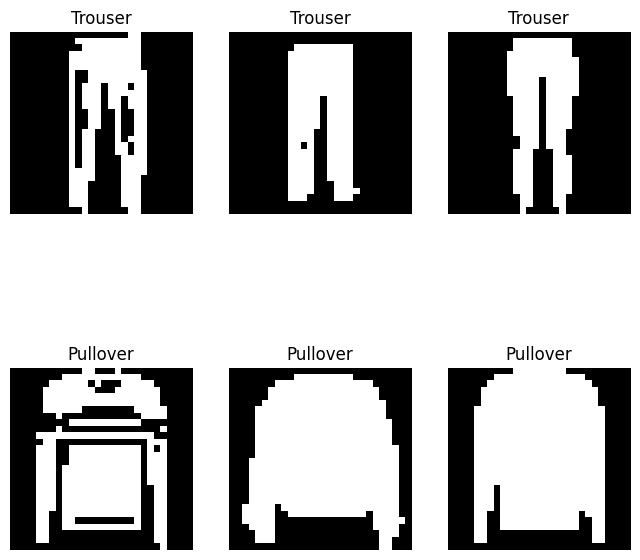

/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


Class prior probability for class 0 is 0.5
Class prior probability for class 1 is 0.5
Metrics for train
Metrics for test
Metrics for train
Metrics for test


=============== MODEL COMPARISON ===============

Model Performance Comparison (Test Data)
Metric               Naive Bayes     Decision Tree   Difference (NB-DT)
-----------------------------------------------------------------
Overall Accuracy     0.8870         0.9570         -0.0700

--- Class: Trouser ---
Accuracy             0.8870         0.9570         -0.0700
Precision            0.8365         0.9607         -0.1242
Recall               0.9620         0.9530         0.0090
TPR                  0.9620         0.9530         0.0090
FPR                  0.1880         0.0390         0.1490

--- Class: Pullover ---
Accuracy             0.8870         0.9570         -0.0700
Precision            0.9553         0.9534         0.0019
Recall               0.8120         0.9610         -0.1490
TPR                  0.8120         0

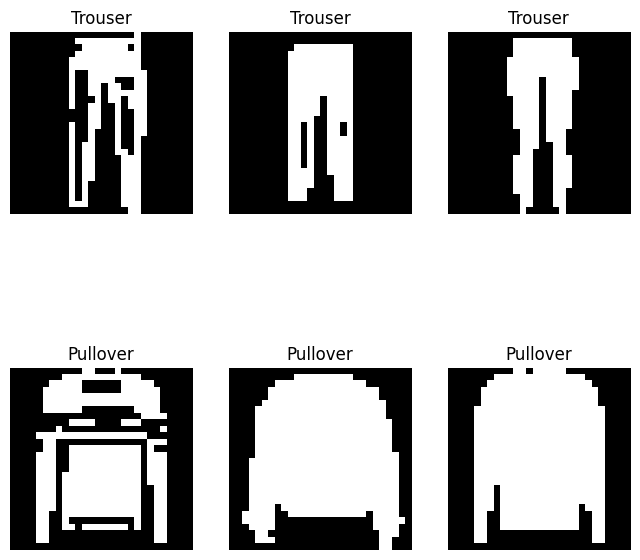

/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


Class prior probability for class 0 is 0.5
Class prior probability for class 1 is 0.5
Metrics for train
Metrics for test
Metrics for train
Metrics for test


=============== MODEL COMPARISON ===============

Model Performance Comparison (Test Data)
Metric               Naive Bayes     Decision Tree   Difference (NB-DT)
-----------------------------------------------------------------
Overall Accuracy     0.8695         0.9510         -0.0815

--- Class: Trouser ---
Accuracy             0.8695         0.9510         -0.0815
Precision            0.8118         0.9483         -0.1365
Recall               0.9620         0.9540         0.0080
TPR                  0.9620         0.9540         0.0080
FPR                  0.2230         0.0520         0.1710

--- Class: Pullover ---
Accuracy             0.8695         0.9510         -0.0815
Precision            0.9534         0.9537         -0.0003
Recall               0.7770         0.9480         -0.1710
TPR                  0.7770         

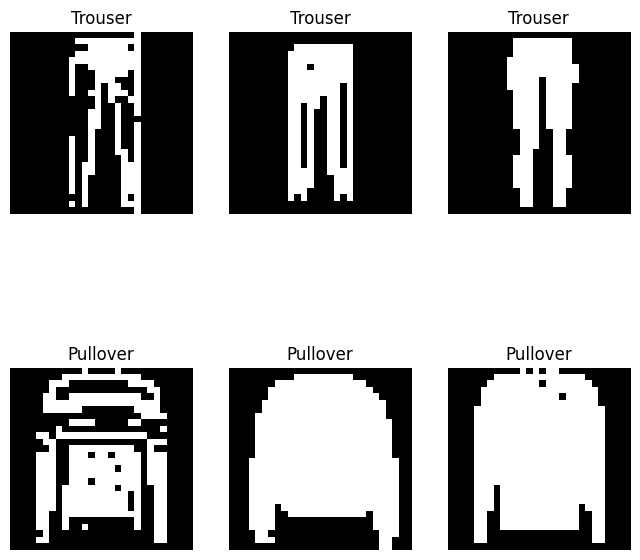

/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


Class prior probability for class 0 is 0.5
Class prior probability for class 1 is 0.5
Metrics for train
Metrics for test
Metrics for train
Metrics for test


=============== MODEL COMPARISON ===============

Model Performance Comparison (Test Data)
Metric               Naive Bayes     Decision Tree   Difference (NB-DT)
-----------------------------------------------------------------
Overall Accuracy     0.8585         0.9465         -0.0880

--- Class: Trouser ---
Accuracy             0.8585         0.9465         -0.0880
Precision            0.7955         0.9496         -0.1541
Recall               0.9650         0.9430         0.0220
TPR                  0.9650         0.9430         0.0220
FPR                  0.2480         0.0500         0.1980

--- Class: Pullover ---
Accuracy             0.8585         0.9465         -0.0880
Precision            0.9555         0.9434         0.0121
Recall               0.7520         0.9500         -0.1980
TPR                  0.7520         0

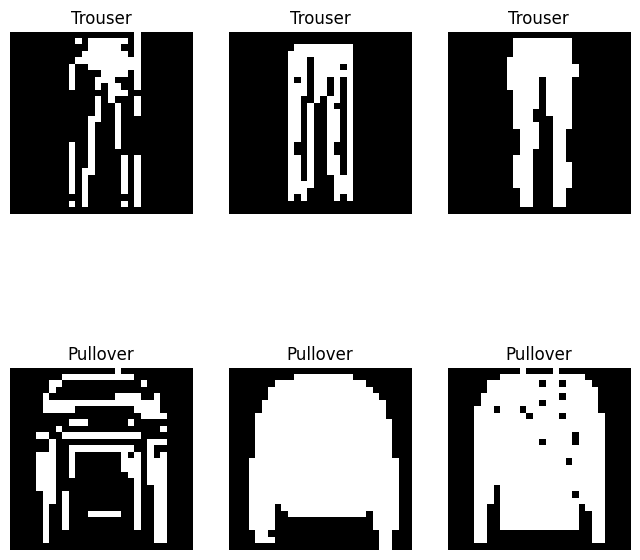

/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


Class prior probability for class 0 is 0.5
Class prior probability for class 1 is 0.5
Metrics for train
Metrics for test
Metrics for train
Metrics for test


=============== MODEL COMPARISON ===============

Model Performance Comparison (Test Data)
Metric               Naive Bayes     Decision Tree   Difference (NB-DT)
-----------------------------------------------------------------
Overall Accuracy     0.8410         0.9335         -0.0925

--- Class: Trouser ---
Accuracy             0.8410         0.9335         -0.0925
Precision            0.7724         0.9511         -0.1787
Recall               0.9670         0.9140         0.0530
TPR                  0.9670         0.9140         0.0530
FPR                  0.2850         0.0470         0.2380

--- Class: Pullover ---
Accuracy             0.8410         0.9335         -0.0925
Precision            0.9559         0.9172         0.0387
Recall               0.7150         0.9530         -0.2380
TPR                  0.7150         0

In [ ]:
################################Bonus Section##########################

def bonus_metrics(y_train_np, y_pred_train, y_test_np, y_pred_test, metrics, classname):
    #metrics calculation for train
    y_train_np = y_train_np.values.ravel().astype(int)
    y_test_np = y_test_np.values.ravel().astype(int)

    print("Metrics for train")
    classes = np.unique(np.concatenate((y_train_np, y_pred_train)))

    for cls in classes:
        true_positive = np.sum((y_train_np==cls) & (y_pred_train==cls))
        true_negative = np.sum((y_train_np!=cls) & (y_pred_train!=cls))
        false_positive = np.sum((y_train_np!=cls) & (y_pred_train==cls))
        false_negative = np.sum((y_train_np==cls) & (y_pred_train!=cls))

        tpr = true_positive/(true_positive+false_negative)
        fpr = false_positive/(false_positive+true_negative)
        accuracy = (true_positive+true_negative)/(true_positive+true_negative+false_positive+false_negative)
        precision = true_positive/(true_positive+false_positive)
        recall = true_positive/(true_positive+false_negative)

        metrics[classname]["train"][f"tpr_{cls}"] = tpr
        metrics[classname]["train"][f"fpr_{cls}"] = fpr
        metrics[classname]["train"][f"accuracy_{cls}"] = accuracy
        metrics[classname]["train"][f"precision_{cls}"] = precision
        metrics[classname]["train"][f"recall_{cls}"] = recall

    #metrics for test
    print("Metrics for test")
    classes = np.unique(np.concatenate((y_test_np, y_pred_test)))

    for cls in classes:
        true_positive = np.sum((y_test_np==cls) & (y_pred_test==cls))
        true_negative = np.sum((y_test_np!=cls) & (y_pred_test!=cls))
        false_positive = np.sum((y_test_np!=cls) & (y_pred_test==cls))
        false_negative = np.sum((y_test_np==cls) & (y_pred_test!=cls))

        tpr = true_positive/(true_positive+false_negative)
        fpr = false_positive/(false_positive+true_negative)
        accuracy = (true_positive+true_negative)/(true_positive+true_negative+false_positive+false_negative)
        precision = true_positive/(true_positive+false_positive)
        recall = true_positive/(true_positive+false_negative)

        metrics[classname]["test"][f"tpr_{cls}"] = tpr
        metrics[classname]["test"][f"fpr_{cls}"] = fpr
        metrics[classname]["test"][f"accuracy_{cls}"] = accuracy
        metrics[classname]["test"][f"precision_{cls}"] = precision
        metrics[classname]["test"][f"recall_{cls}"] = recall


    return metrics

#################below creating threshold between 100 to 200 with 10 difference
new_threshold = np.arange(100, 200, 10)
for i in new_threshold:
  print(f"Bonus Threshold: {i}")
  X_train_bonus = (X_train_selected_classes>=i).astype(int)
  X_test_bonus = (X_test_selected_classes>=i).astype(int)
  y_train_bonus = (y_train_selected_classes==2).astype(int)
  y_test_bonus = (y_test_selected_classes==2).astype(int)

  trouser_index = np.where(y_train_bonus==0)[0][:3]
  pullover_index = np.where(y_train_bonus==1)[0][:3]

  fig, ax = plt.subplots(2,3, figsize = (8,8))
  for i, index in enumerate(trouser_index):
    ax[0,i].imshow(X_train_bonus.iloc[index].values.reshape(28,28), cmap='gray')
    ax[0,i].set_title('Trouser')
    ax[0,i].axis('off')
  for i, index in enumerate(pullover_index):
    ax[1,i].imshow(X_train_bonus.iloc[index].values.reshape(28,28), cmap='gray')
    ax[1,i].set_title('Pullover')
    ax[1,i].axis('off')
  plt.show()


  X_train_np_bonus = X_train_bonus.values if isinstance(X_train_bonus, pd.DataFrame) else X_train_bonus
  y_train_np_bonus = y_train_bonus.values if isinstance(y_train_bonus, pd.Series) else y_train_bonus
  X_test_np_bonus = X_test_bonus.values if isinstance(X_test_bonus, pd.DataFrame) else X_test_bonus
  y_test_np_bonus = y_test_bonus.values if isinstance(y_test_bonus, pd.Series) else y_test_bonus


  class_prior_probability, class_conditional_probability = train_data_NB(X_train_np_bonus, y_train_np_bonus)
  y_pred_train_bonus, y_proba_train_bonus = predict_NB(X_train_np_bonus, class_prior_probability, class_conditional_probability)
  y_pred_test_bonus, y_proba_test_bonus = predict_NB(X_test_np_bonus, class_prior_probability, class_conditional_probability)

  ##########decision tree implementation

  dt_bonus= DecisionTreeClassifier(
    criterion='gini',
    max_depth=10,
    random_state=5644 #added course number for this cls
  )
  dt_bonus.fit(X_train_np_bonus, y_train_np_bonus)
  y_pred_train_dt_bonus = dt_bonus.predict(X_train_np_bonus)
  y_pred_test_dt_bonus = dt_bonus.predict(X_test_np_bonus)
  y_pred_proba_train_dt_bonus = dt_bonus.predict_proba(X_train_np_bonus)
  y_pred_proba_test_dt_bonus = dt_bonus.predict_proba(X_test_np_bonus)

  ##############checking metrics for both the implementations
  metrics_bonus = {
    "naive_bayes": {"train": {}, "test": {}},
    "decision_tree": {"train": {}, "test": {}}
  }

  metrics_bonus = bonus_metrics(y_train_np_bonus, y_pred_train_bonus, y_test_np_bonus, y_pred_test_bonus, metrics_bonus, "naive_bayes")
  metrics_bonus = bonus_metrics(y_train_np_bonus, y_pred_train_dt_bonus, y_test_np_bonus, y_pred_test_dt_bonus, metrics_bonus, "decision_tree")

###############comparision
  print("\n\n=============== MODEL COMPARISON ===============\n")
  print("Model Performance Comparison (Test Data)")

  # Header row
  print(f"{'Metric':<20} {'Naive Bayes':<15} {'Decision Tree':<15} {'Difference (NB-DT)':<15}")
  print("-" * 65)

  # Overall accuracy - if it exists in the metrics dictionary
  if "overall_accuracy" in metrics_bonus["naive_bayes"]["test"] and "overall_accuracy" in metrics_bonus["decision_tree"]["test"]:
      nb_acc = metrics_bonus["naive_bayes"]["test"]["overall_accuracy"]
      dt_acc = metrics_bonus["decision_tree"]["test"]["overall_accuracy"]
      diff_acc = nb_acc - dt_acc
      print(f"{'Overall Accuracy':<20} {nb_acc:.4f}         {dt_acc:.4f}         {diff_acc:.4f}")
  else:
      # Calculate overall accuracy if not in the dictionary
      # Safety check for dimensions - convert to 1D arrays if needed
      if hasattr(y_test_np_bonus, 'values') and y_test_np_bonus.values.ndim > 1:
          y_test_flat = y_test_np_bonus.values.ravel()
      else:
          y_test_flat = y_test_np_bonus

      if hasattr(y_pred_test_bonus, 'values') and y_pred_test_bonus.values.ndim > 1:
          y_pred_nb_flat = y_pred_test_bonus.values.ravel()
      else:
          y_pred_nb_flat = y_pred_test_bonus

      if hasattr(y_pred_test_dt_bonus, 'values') and y_pred_test_dt_bonus.values.ndim > 1:
          y_pred_dt_flat = y_pred_test_dt_bonus.values.ravel()
      else:
          y_pred_dt_flat = y_pred_test_dt_bonus

      try:
          nb_acc = np.mean(y_test_flat == y_pred_nb_flat)
          dt_acc = np.mean(y_test_flat == y_pred_dt_flat)
          diff_acc = nb_acc - dt_acc
          print(f"{'Overall Accuracy':<20} {nb_acc:.4f}         {dt_acc:.4f}         {diff_acc:.4f}")
      except:
          print("Could not calculate overall accuracy due to dimension mismatch")

  # Class-specific metrics from the dictionary
  classes = np.array([0, 1])  # Explicitly list classes
  class_names = {0: "Trouser", 1: "Pullover"}

  for cls in classes:
      cls_name = class_names[cls]
      print(f"\n--- Class: {cls_name} ---")

      # Get metrics from the dictionary
      nb_precision = metrics_bonus["naive_bayes"]["test"][f"precision_{cls}"]
      dt_precision = metrics_bonus["decision_tree"]["test"][f"precision_{cls}"]
      diff_precision = nb_precision - dt_precision

      nb_recall = metrics_bonus["naive_bayes"]["test"][f"recall_{cls}"]
      dt_recall = metrics_bonus["decision_tree"]["test"][f"recall_{cls}"]
      diff_recall = nb_recall - dt_recall

      # Class-specific accuracy
      nb_accuracy = metrics_bonus["naive_bayes"]["test"][f"accuracy_{cls}"]
      dt_accuracy = metrics_bonus["decision_tree"]["test"][f"accuracy_{cls}"]
      diff_accuracy = nb_accuracy - dt_accuracy

      nb_tpr = metrics_bonus["naive_bayes"]["test"][f"tpr_{cls}"]
      dt_tpr = metrics_bonus["decision_tree"]["test"][f"tpr_{cls}"]
      diff_tpr = nb_tpr - dt_tpr

      nb_fpr = metrics_bonus["naive_bayes"]["test"][f"fpr_{cls}"]
      dt_fpr = metrics_bonus["decision_tree"]["test"][f"fpr_{cls}"]
      diff_fpr = nb_fpr - dt_fpr

      # Print metrics including class-specific accuracy
      print(f"{'Accuracy':<20} {nb_accuracy:.4f}         {dt_accuracy:.4f}         {diff_accuracy:.4f}")
      print(f"{'Precision':<20} {nb_precision:.4f}         {dt_precision:.4f}         {diff_precision:.4f}")
      print(f"{'Recall':<20} {nb_recall:.4f}         {dt_recall:.4f}         {diff_recall:.4f}")
      print(f"{'TPR':<20} {nb_tpr:.4f}         {dt_tpr:.4f}         {diff_tpr:.4f}")
      print(f"{'FPR':<20} {nb_fpr:.4f}         {dt_fpr:.4f}         {diff_fpr:.4f}")

